# 1. Data Load & Understanding & Initial Preparation

## Imports & Utilities


In [1]:
# General stuff
import os
import time

# Import maths related packages
import pandas as pd
import numpy as np
import math

# Import plotting packages
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Reset to Default
# plt.style.use('default')


In [2]:
# Data Prep Stuff

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [3]:
def get_data_path(data_directory = 'Data'):
    project_root = os.path.dirname(os.getcwd())
    data_path = os.path.join(project_root, data_directory)
    if not os.path.isdir(data_path):
        raise Exception(f'Directory not found: {data_path}')  
     
    return data_path

In [4]:
def get_csv_file(data_path, file_name):
    file_path = os.path.join(data_path, file_name)
    if not os.path.isfile(file_path):
        raise Exception(f'File not found: {file_path}')
    
    df = pd.read_csv(file_path)

    return df

In [5]:
# Utilities to display aspects of a dataframe

def display_file_summary(data_frame, name=""):
    # Create a temporary df and ensure no lists remain, so that unique items can be identified for uniqueness
    temp_df = data_frame.copy()
    temp_df = temp_df.map(lambda cell: str(cell) if isinstance(cell, list) else cell)
    
    # Calculate Data Types 
    summary_of_df = pd.DataFrame({'Count': data_frame.count(),
                                 'Missing': data_frame.isnull().sum(), 'Empty': 0,
                                 'Unique': temp_df.nunique(),
                                 'Top': data_frame.apply(lambda x: x.value_counts().index[0]),
                                 'Freq': data_frame.apply(lambda x: x.value_counts().iat[0]),
                                 'Type': data_frame.dtypes, 
                                 'String': 0, 'Int': 0, 'Float': 0, 'Bool': 0, 'List': 0, 'Other': 0
                                 })
    # ?? Below with Map should not work as counting entire data frame, but counts do appear correct
    #test = data_frame['Description'].apply(lambda cell: isinstance(cell, str)).sum()
    summary_of_df['Empty'] = (data_frame == '').sum()
    summary_of_df['String'] = data_frame.map(lambda cell: isinstance(cell, str)).sum()
    summary_of_df['Int'] = data_frame.map(lambda cell: isinstance(cell, int)).sum()
    summary_of_df['Float'] = data_frame.map(lambda cell: isinstance(cell, float)).sum()
    summary_of_df['Bool'] = data_frame.map(lambda cell: isinstance(cell, bool)).sum()
    summary_of_df['List'] = data_frame.map(lambda cell: isinstance(cell, list)).sum()
    summary_of_df['Other'] = data_frame.map(lambda cell: isinstance(cell, (tuple,dict,set,type(None)))).sum()

    print(f'File Details. {name}')
    display(summary_of_df)

def display_file_stats(data_frame, name=""):
    print(f'File Stats For Numerics. {name}')
    display(data_frame.describe().T.style.format("{:.2f}"))


In [6]:
# Plots of Data Distribution

def plot_data_distributions(data_frame, name=""):

    print(f'Data Distributions for {name}')

    # Histograms of all Numeric Variables
    _ = data_frame.hist(figsize=(15, 10), color='blue')

    plt.tight_layout()
    plt.show()

    # Bar Plot for Nin-Numeric Variables
    object_columns = data_frame.select_dtypes(include=object).columns
    num_cols = 3
    num_rows = math.ceil(len(object_columns) / num_cols)

    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
    fig.tight_layout(pad=3.0)
    axs = axs.flatten()

    # Plot each column
    for i, col in enumerate(object_columns):
        data_frame[col].value_counts().plot(kind='bar', ax=axs[i])
        axs[i].set_title(col)
        axs[i].tick_params(axis='x', rotation=45)

    # Remove any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()



In [7]:
def quick_hist(series, bins=0):
    if not isinstance(series, list):
        series = [series]

    fig, axes = plt.subplots(nrows=1, ncols=len(series), figsize=(12,5), squeeze=False)
    axes = axes.flatten()
    for (nextSeries, nextAx) in zip(series, axes):
        if bins == 0:
            nextAx.hist(nextSeries, color='blue')
        else:
            nextAx.hist(nextSeries, color='blue', bins=bins)

    plt.tight_layout()
    plt.show()

## Data Load

In [8]:
# CSV File Data Load to a Pandas dataframe 
# - A specified folder one level above the project

data_path = get_data_path(data_directory='Data')   
file_name="wallacecommunications.csv"
df = get_csv_file(data_path, file_name=file_name)

File Contents. wallacecommunications.csv


,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,32390233,Bristol,UK,39,management,married,tertiary,no,-1.90,no,yes,unknown,4,11,jun,8,-1,0,unknown,yes
1,41226029,Basildon,UK,53,housemaid,married,primary,no,3.62,no,no,cellular,1,28,jul,2,-1,0,unknown,yes
2,85498057,Blackburn,UK,79,retired,divorced,primary,no,27.87,no,no,telephone,3,13,jul,1,377,1,success,yes
3,76539627,Oldham,UK,43,services,single,secondary,no,5.50,yes,no,cellular,3,13,may,2,-1,0,unknown,no
4,76290986,Middlesbrough,UK,35,technician,single,secondary,no,3.44,no,no,cellular,2,27,aug,16,-1,0,unknown,yes


File Details. wallacecommunications.csv


,Count,Missing,Empty,Unique,Top,Freq,Type,String,Int,Float,Bool,List,Other
ID,50662,0,0,50644,80354425,2,int64,0,50662,0,0,0,0
town,50662,0,0,101,London,3241,object,50662,0,0,0,0,0
country,50662,0,0,5,UK,50657,object,50662,0,0,0,0,0
age,50662,0,0,76,32,2273,int64,0,50662,0,0,0,0
job,50662,0,0,12,management,10849,object,50662,0,0,0,0,0
married,50662,0,0,3,married,30045,object,50662,0,0,0,0,0
education,50662,0,0,4,secondary,25779,object,50662,0,0,0,0,0
arrears,50662,0,0,2,no,49794,object,50662,0,0,0,0,0
current_balance,50662,0,0,6928,0.0,3836,float64,0,0,50662,0,0,0
housing,50662,0,0,2,yes,27250,object,50662,0,0,0,0,0


File Stats For Numerics. wallacecommunications.csv


,count,mean,std,min,25%,50%,75%,max
ID,50662.00,55028712.75,25985959.78,10000726.00,32499637.25,55011272.00,77488092.25,99999515.00
age,50662.00,40.98,10.92,18.00,32.00,39.00,48.00,95.00
current_balance,50662.00,13.99,30.90,-80.19,0.82,4.72,14.95,984.17
conn_tr,50662.00,3.01,1.41,1.00,2.00,3.00,4.00,5.00
last_contact_this_campaign_day,50662.00,15.77,8.35,1.00,8.00,16.00,21.00,31.00
this_campaign,50662.00,2.71,3.05,1.00,1.00,2.00,3.00,63.00
days_since_last_contact_previous_campaign,50662.00,42.64,102.24,-1.00,-1.00,-1.00,-1.00,871.00
contacted_during_previous_campaign,50662.00,0.64,2.36,0.00,0.00,0.00,0.00,275.00


Data Distributions for wallacecommunications.csv


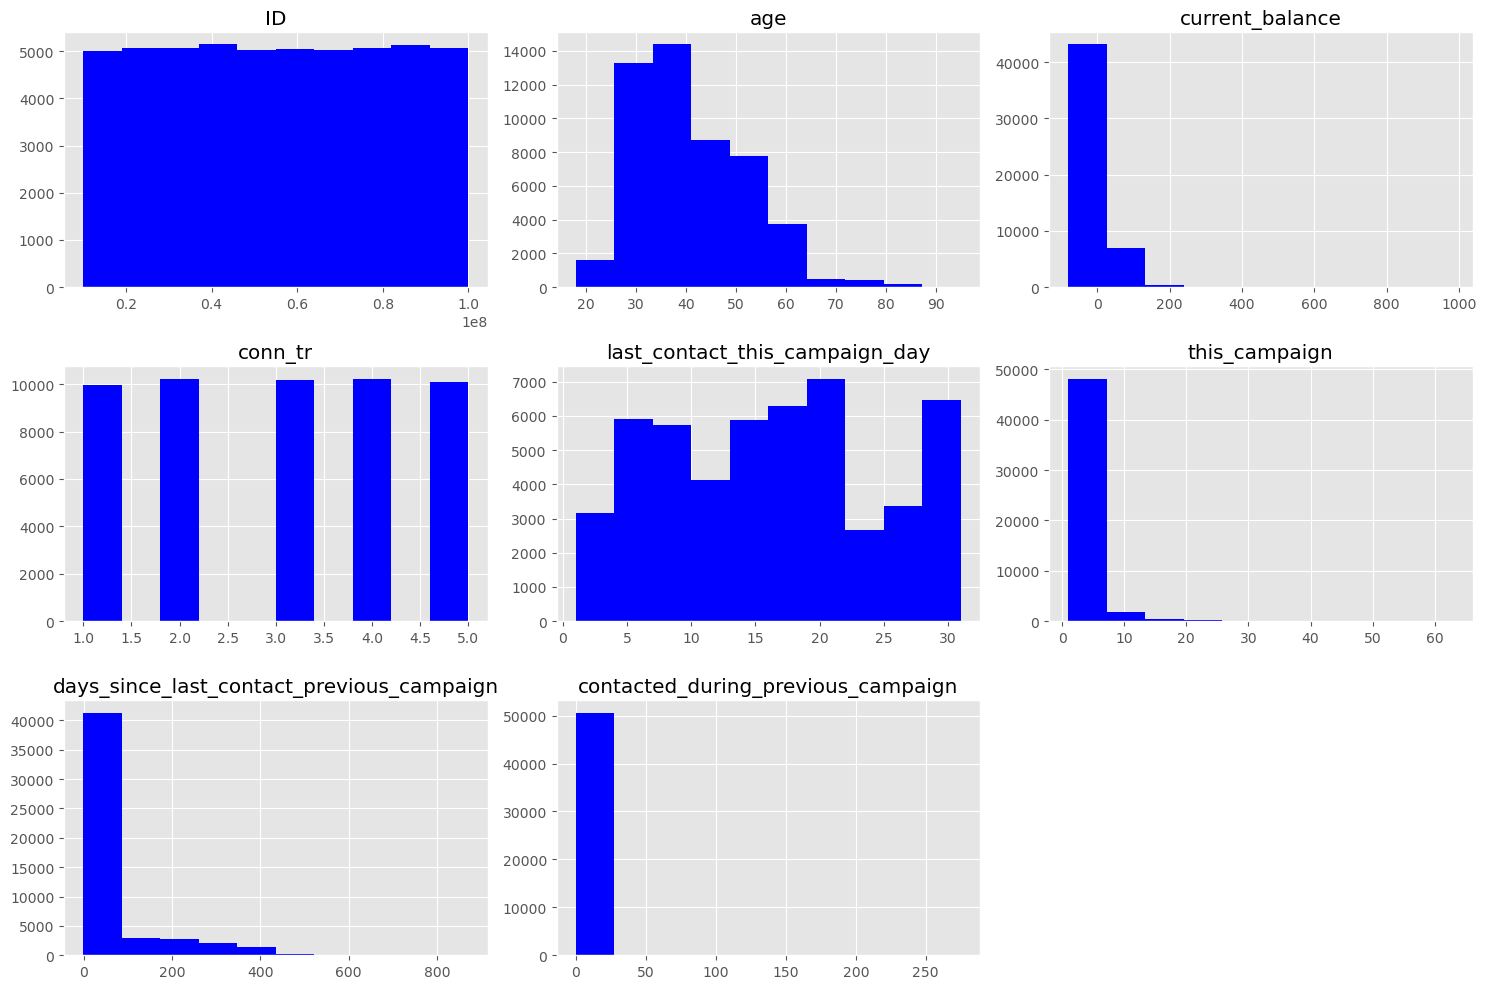

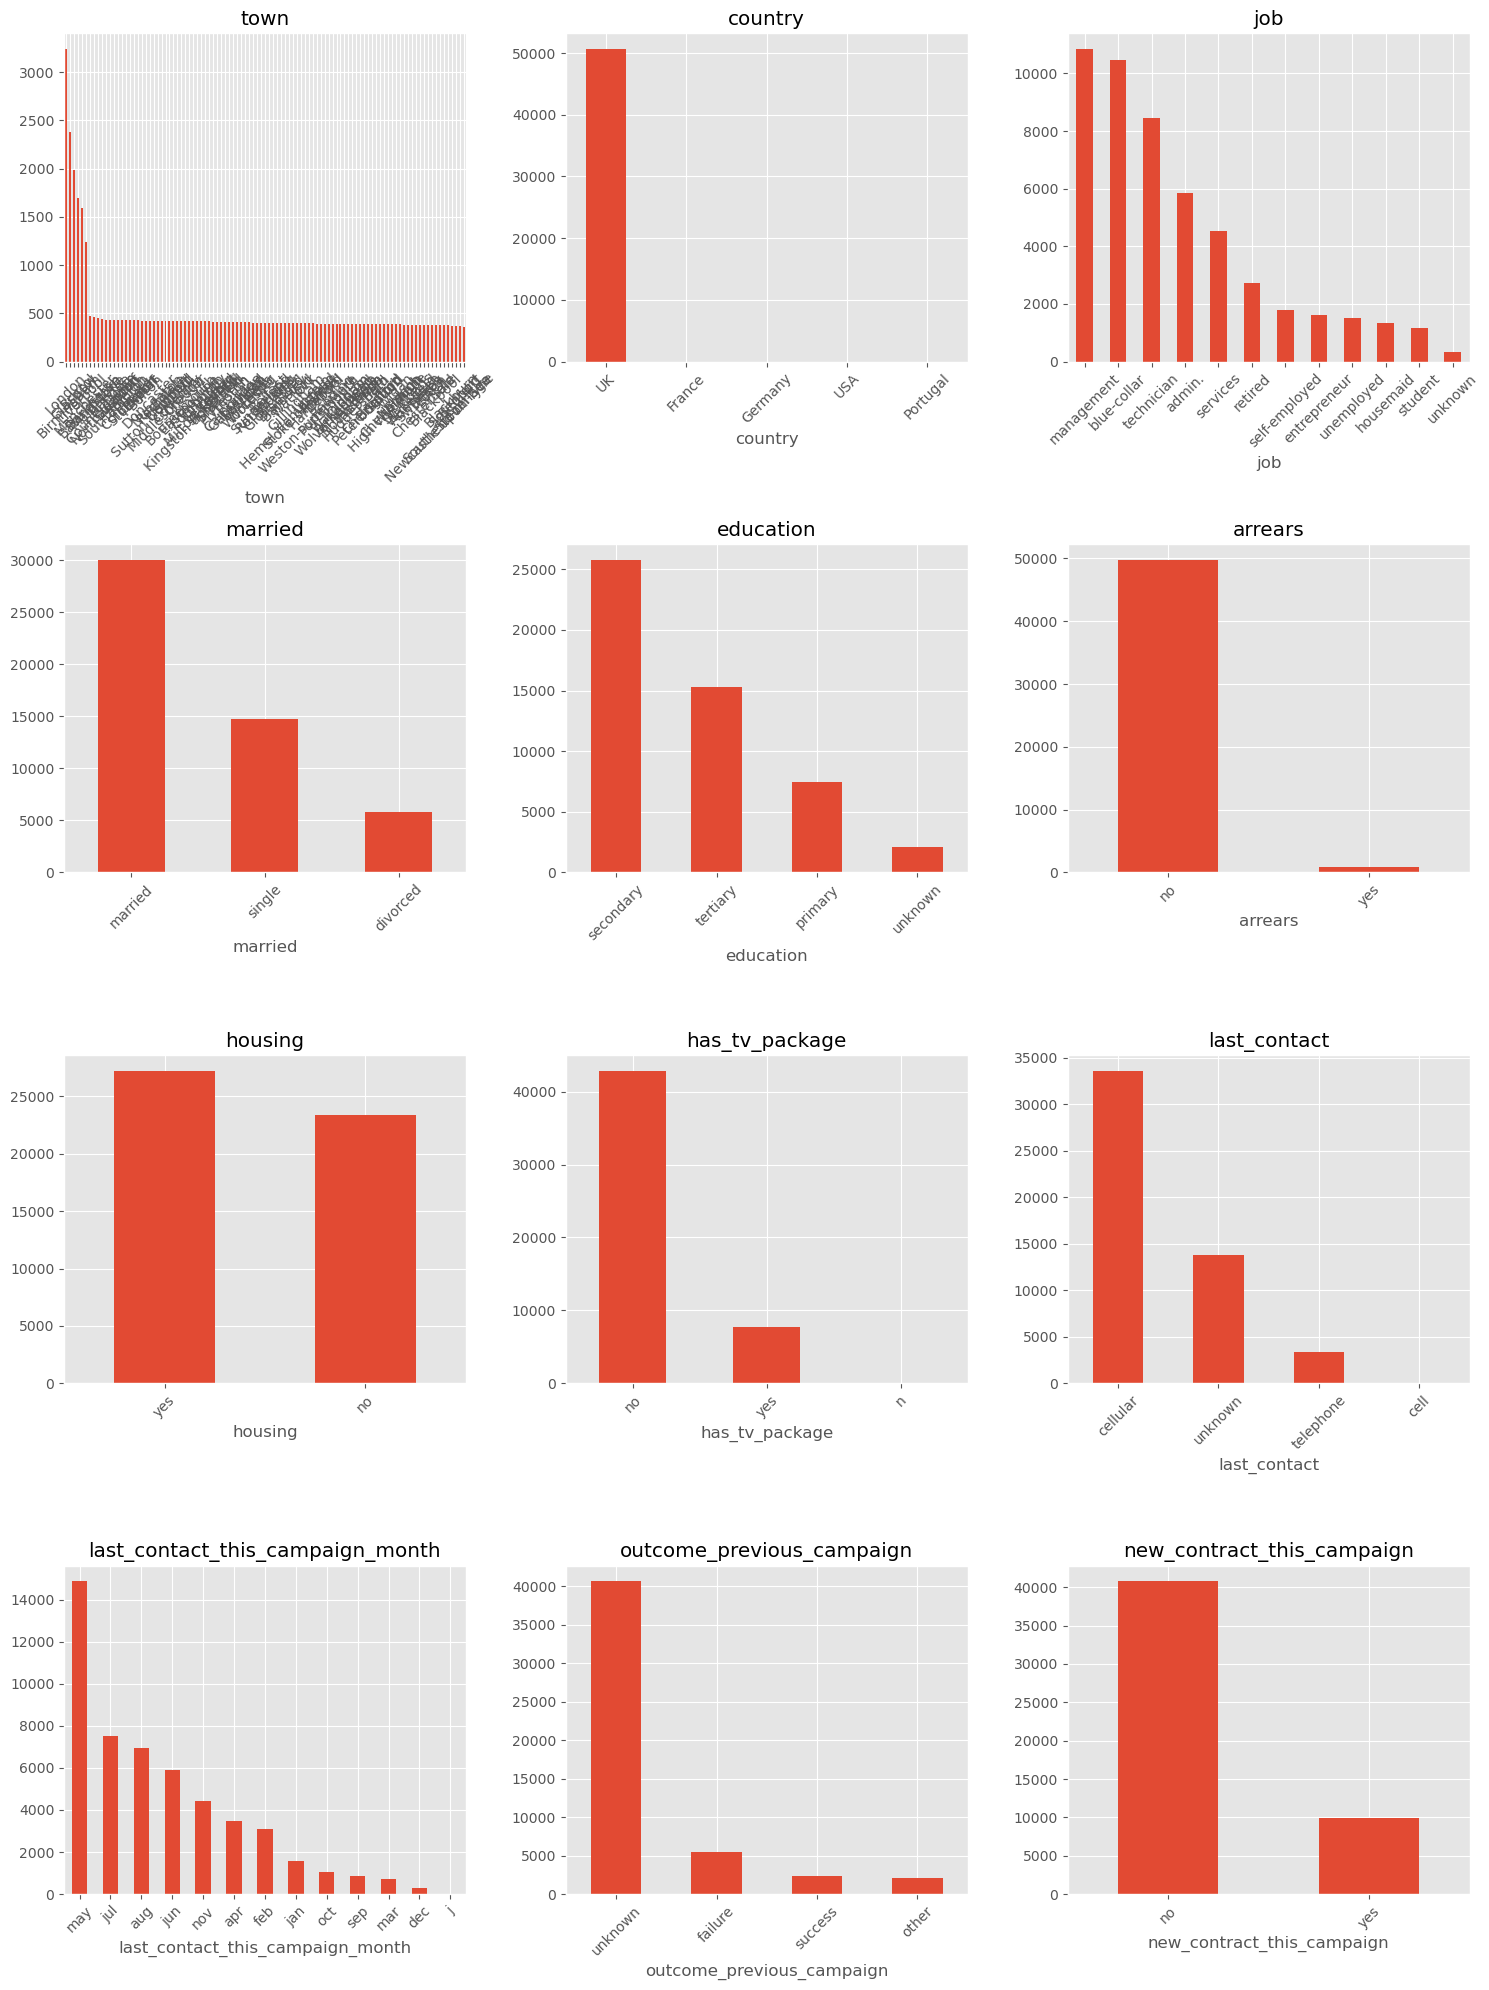

In [9]:
# Initial look at the data

# Data Examples & Stats
print(f'File Contents. {file_name}')
display(df.head())
display_file_summary(df, file_name)
display_file_stats(df, file_name)

# Data Distributions
plot_data_distributions(df, file_name)


To Consider:

- Missing Values - eg impute
- Duplicates - resolve, remove
- Inconsistencies, formatting eg categorical labeling, measurement scales 
- Outliers - eg remove
- Flat & wide
- Unbalanced Distributions - ?? SMOTE, other approaches ....
- Major Values
- Normalisation / scaling
- Categorical encoding

?? Dimensionality Reduction

## Full Dataset Cleaning & Reduction

In [10]:
# Copy Data for Cleaning
df_cleaned = df.copy()

# Records Dropped
df_cleaned.drop(df_cleaned[df_cleaned['last_contact_this_campaign_month'] == 'j'].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['contacted_during_previous_campaign'] == 275].index, inplace=True)

# Drop Clearly Unhelpful Variables
# dropped_variables = ['ID', 'town',
#                      'country', 'arrears', 'conn_tr', 
#                      'last_contact_this_campaign_day', 'last_contact_this_campaign_month',
#                      'days_since_last_contact_previous_campaign', 'contacted_during_previous_campaign', 'outcome_previous_campaign']


# Restored outcome previous campaign
dropped_variables = ['ID', 'town',
                     'country', 'arrears', 'conn_tr', 
                     'last_contact_this_campaign_day', 'last_contact_this_campaign_month',
                     'days_since_last_contact_previous_campaign', 'contacted_during_previous_campaign']

df_cleaned.drop(dropped_variables, axis=1, inplace=True)

# Variables Cleaned
df_cleaned['has_tv_package'] = df_cleaned['has_tv_package'].replace('n', 'no')
df_cleaned['last_contact'] = df_cleaned['last_contact'].replace('cell', 'cellular')

# Before and After
print(df.shape)
print(df_cleaned.shape)


(50662, 20)
(50660, 11)


File Contents. wallacecommunications.csv


,age,job,married,education,current_balance,housing,has_tv_package,last_contact,this_campaign,outcome_previous_campaign,new_contract_this_campaign
0,39,management,married,tertiary,-1.90,no,yes,unknown,8,unknown,yes
1,53,housemaid,married,primary,3.62,no,no,cellular,2,unknown,yes
2,79,retired,divorced,primary,27.87,no,no,telephone,1,success,yes
3,43,services,single,secondary,5.50,yes,no,cellular,2,unknown,no
4,35,technician,single,secondary,3.44,no,no,cellular,16,unknown,yes


File Details. wallacecommunications.csv


,Count,Missing,Empty,Unique,Top,Freq,Type,String,Int,Float,Bool,List,Other
age,50660,0,0,76,32,2272,int64,0,50660,0,0,0,0
job,50660,0,0,12,management,10848,object,50660,0,0,0,0,0
married,50660,0,0,3,married,30043,object,50660,0,0,0,0,0
education,50660,0,0,4,secondary,25778,object,50660,0,0,0,0,0
current_balance,50660,0,0,6928,0.0,3836,float64,0,0,50660,0,0,0
housing,50660,0,0,2,yes,27249,object,50660,0,0,0,0,0
has_tv_package,50660,0,0,2,no,42889,object,50660,0,0,0,0,0
last_contact,50660,0,0,3,cellular,33595,object,50660,0,0,0,0,0
this_campaign,50660,0,0,48,1,20116,int64,0,50660,0,0,0,0
outcome_previous_campaign,50660,0,0,4,unknown,40613,object,50660,0,0,0,0,0


File Stats For Numerics. wallacecommunications.csv


,count,mean,std,min,25%,50%,75%,max
age,50660.00,40.98,10.92,18.00,32.00,39.00,48.00,95.00
current_balance,50660.00,13.99,30.90,-80.19,0.82,4.72,14.95,984.17
this_campaign,50660.00,2.71,3.05,1.00,1.00,2.00,3.00,63.00


Data Distributions for wallacecommunications.csv


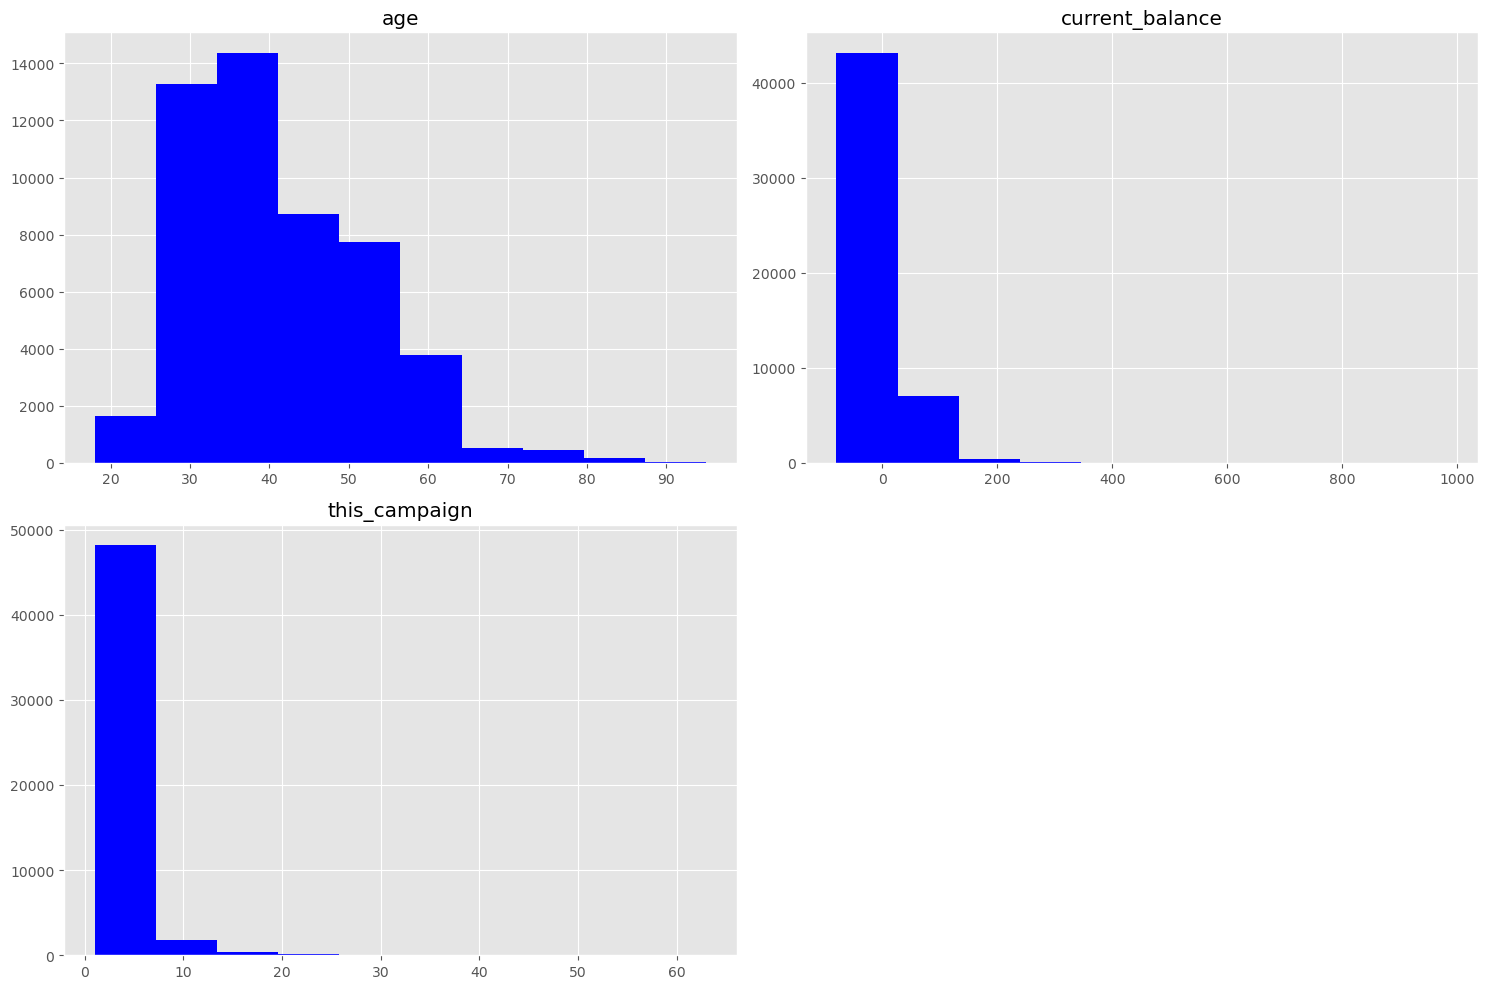

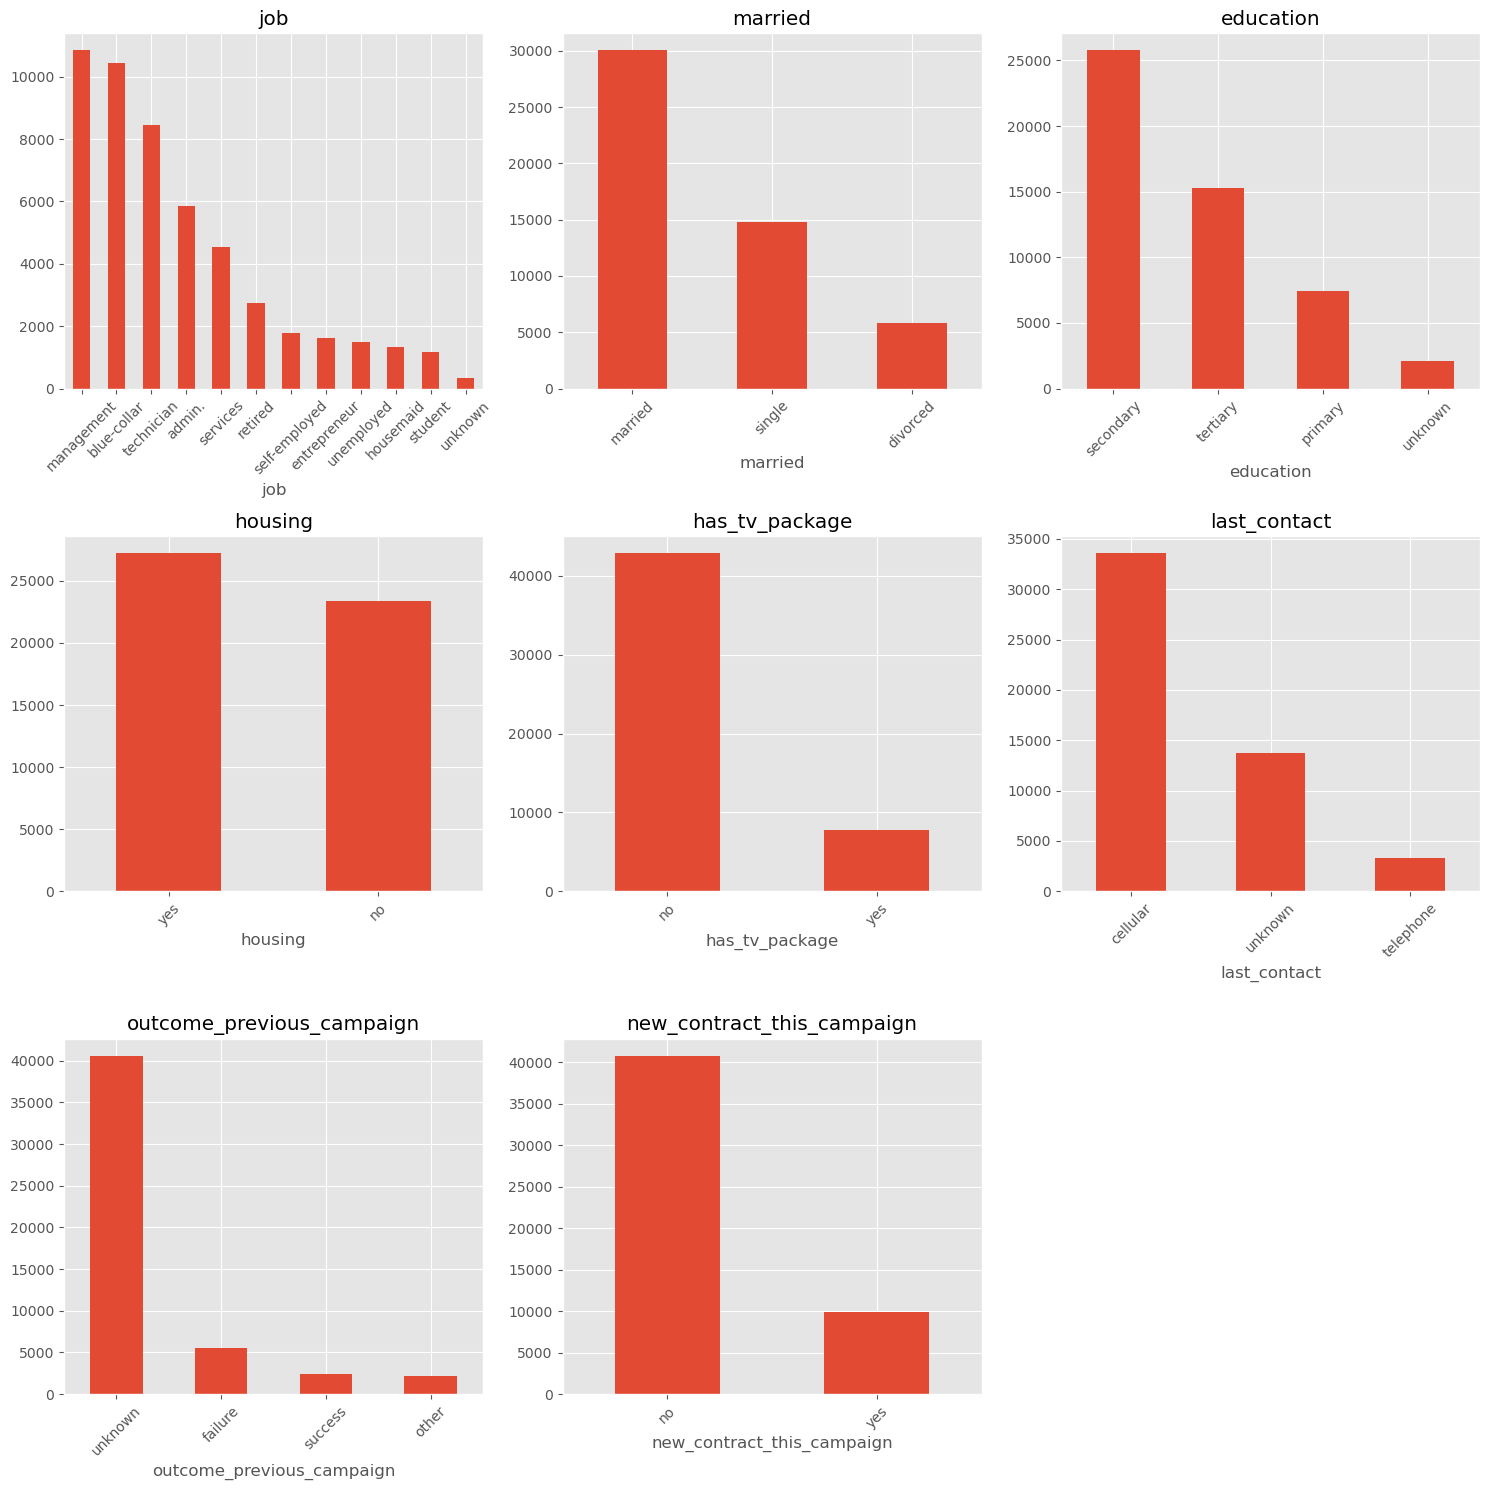

In [11]:
# Review the data

# Data Examples & Stats
print(f'File Contents. {file_name}')
display(df_cleaned.head())
display_file_summary(df_cleaned, file_name)
display_file_stats(df_cleaned, file_name)

# Data Distributions
plot_data_distributions(df_cleaned, file_name)

## Temp _ Outliers

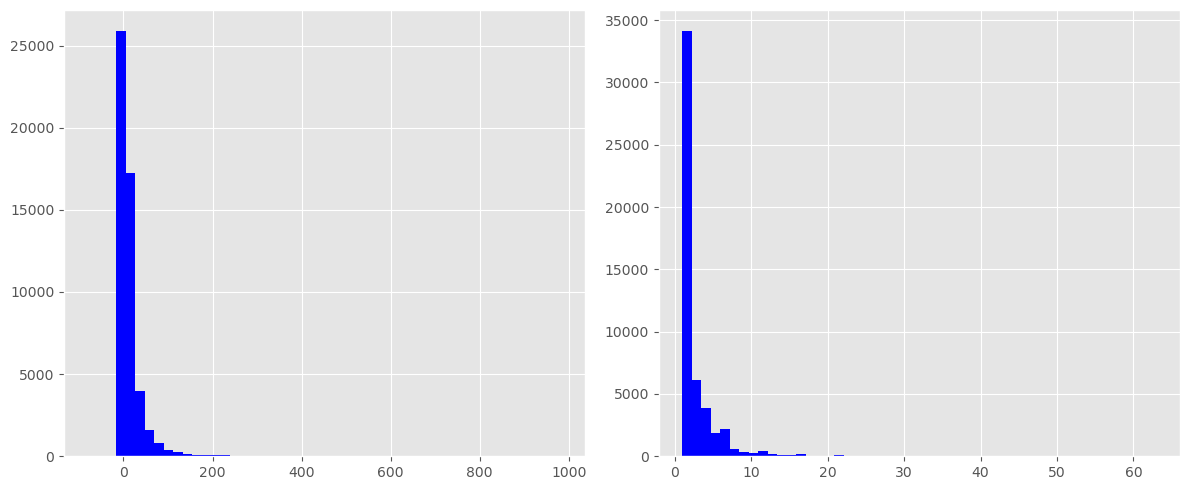

322.9857697930224 33.2357040820854
Number of records with 'current_balance' above threshold: 58
Number of records with 'this_campaign' above threshold2: 35


In [12]:
# Examine Outliers

df_temp = df_cleaned.copy()

quick_hist([df_temp['current_balance'], df_temp['this_campaign']], bins=50)

# Define outlier threshold (example: remove values > 3 standard deviations)
threshold = np.mean(df_temp['current_balance']) + 10 * np.std(df_temp['current_balance'])
threshold2 = np.mean(df_temp['this_campaign']) + 10 * np.std(df_temp['this_campaign'])

print(threshold, threshold2)
num_records_above_threshold = len(df_temp[df_temp['current_balance'] > threshold])
num_records_above_threshold2 = len(df_temp[df_temp['this_campaign'] > threshold2])

print(f"Number of records with 'current_balance' above threshold: {num_records_above_threshold}")
print(f"Number of records with 'this_campaign' above threshold2: {num_records_above_threshold2}")

(50662, 20)
(50660, 11)
(50602, 11)
(50567, 11)


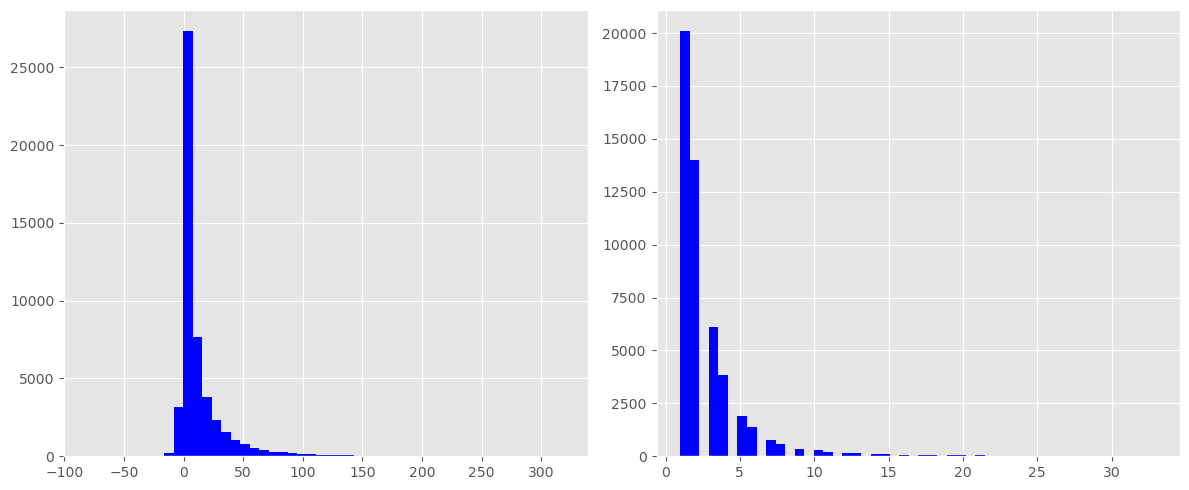

In [13]:
print(df.shape)
print(df_cleaned.shape)

df_temp.drop(df_temp[df_temp['current_balance'] >= threshold].index, inplace=True)
print(df_temp.shape)

df_temp.drop(df_temp[df_temp['this_campaign'] >= threshold2].index, inplace=True)
print(df_temp.shape)

quick_hist([df_temp['current_balance'], df_temp['this_campaign']], bins=50)


In [14]:
# Apply to full dataframe ... not supposed too!!

# df_cleaned.drop(df_cleaned[df_cleaned['current_balance'] >= threshold].index, inplace=True)
# df_cleaned.drop(df_cleaned[df_cleaned['this_campaign'] >= threshold2].index, inplace=True)
# print(df_cleaned.shape)



# 2. Data Split

In [15]:
# Separate features (X) and target variable (y)
targetName = "new_contract_this_campaign"
featureNames = df_cleaned.columns[df_cleaned.columns != targetName]

X = df_cleaned[featureNames]
y = df_cleaned[targetName]

# Split of training and testing data, 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Transforms on Training Data

In [16]:
# Establish and fit a pipeline for all data transformations

# Establish a transformation for categorical and numerical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'bool']).columns

print(f'Numerics {len(numerical_features)} \n', numerical_features)
print(f'Categoricals {len(categorical_features)} \n', categorical_features)

transformations = [
    ('cat', OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist'), categorical_features),
    ('num', RobustScaler(), numerical_features)
]

# Add to pipeline, and later add other actions such as dropping rows, imputing etc etc
data_prep_pipeline = Pipeline([
    #('imputer', SimpleImputer(strategy='mean')),
    ('col_transform', ColumnTransformer(transformers=transformations))
])
data_prep_pipeline.fit(X_train)


Numerics 3 
 Index(['age', 'current_balance', 'this_campaign'], dtype='object')
Categoricals 7 
 Index(['job', 'married', 'education', 'housing', 'has_tv_package',
       'last_contact', 'outcome_previous_campaign'],
      dtype='object')


Pipeline(steps=[('col_transform',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist'),
                                                  Index(['job', 'married', 'education', 'housing', 'has_tv_package',
       'last_contact', 'outcome_previous_campaign'],
      dtype='object')),
                                                 ('num', RobustScaler(),
                                                  Index(['age', 'current_balance', 'this_campaign'], dtype='object'))]))])

In [17]:
# Transform the separate datasets
X_train_transformed = data_prep_pipeline.transform(X_train)
X_test_transformed = data_prep_pipeline.transform(X_test)


In [18]:
display(f'Original: {df.shape}')
display(f'Cleaned: {df_cleaned.shape}')

display(f'X_Train: {X_train_transformed.shape}')
display(f'X_Test: {X_test_transformed.shape}')
display(data_prep_pipeline.get_feature_names_out())
feature_names = data_prep_pipeline.get_feature_names_out()

'Original: (50662, 20)'

'Cleaned: (50660, 11)'

'X_Train: (40528, 26)'

'X_Test: (10132, 26)'

array(['cat__job_blue-collar', 'cat__job_entrepreneur',
       'cat__job_housemaid', 'cat__job_management', 'cat__job_retired',
       'cat__job_self-employed', 'cat__job_services', 'cat__job_student',
       'cat__job_technician', 'cat__job_unemployed', 'cat__job_unknown',
       'cat__married_married', 'cat__married_single',
       'cat__education_secondary', 'cat__education_tertiary',
       'cat__education_unknown', 'cat__housing_yes',
       'cat__has_tv_package_yes', 'cat__last_contact_telephone',
       'cat__last_contact_unknown',
       'cat__outcome_previous_campaign_other',
       'cat__outcome_previous_campaign_success',
       'cat__outcome_previous_campaign_unknown', 'num__age',
       'num__current_balance', 'num__this_campaign'], dtype=object)

# 4. Save Data For Modelling

In [19]:
import pickle

container = (X_train_transformed, X_test_transformed, y_train, y_test, feature_names)
with open('xy_data.pickle', 'wb') as file:
    pickle.dump(container, file)

## Oversample Imblanced Target Variable with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter


# Check class distribution before SMOTE
print("Before SMOTE:")
print(f"Training set class distribution: {Counter(y_train)}")
print(f"Test set class distribution: {Counter(y_test)}")




In [ ]:
# Step 2: Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

# Check class distribution after SMOTE
print("\nAfter SMOTE:")
print(f"Resampled training set class distribution: {Counter(y_train_resampled)}")

In [ ]:
display(f'X_Train: {X_train_resampled.shape}')
display(f'X_Test: {X_test_transformed.shape}')


In [ ]:
import pickle

container = (X_train_resampled, X_test_transformed, y_train_resampled, y_test)
with open('xy_data.pickle', 'wb') as file:
    pickle.dump(container, file)

In [ ]:
# Outliers Removed - Temp

df_temp = df_cleaned.copy()

# Records Dropped
df_temp.drop(df_temp[df_temp['current_balance'] >= 750].index, inplace=True)
df_temp.drop(df_temp[df_temp['this_campaign'] >= 30].index, inplace=True)

print(df.shape)
print(df_cleaned.shape)
print(df_cleaned.shape)
print(df_temp.shape)

![Example Image](scalers.png)


